In [17]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv("random_forest_data.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   samples               101 non-null    object 
 1   accuracy              101 non-null    float64
 2   authentic_mislabeled  101 non-null    object 
 3   synthetic_mislabeled  101 non-null    object 
 4   top_10_features       101 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.1+ KB


In [20]:
df.head()

,samples,accuracy,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,"['ALCOTT_synthetic_combined_64.txt', 'ALCOTT_s...",0.9975,[],['AUSTEN_synthetic_combined_160.txt'],"{'of': 0.08220234768085538, 'which': 0.0737889..."
1,"['ALCOTT_synthetic_combined_42.txt', 'ALCOTT_s...",0.9900,['Hopkins_2.txt'],"['TWAIN_synthetic_combined_83.txt', 'AUSTEN_sy...","{'of': 0.07662987886777418, 'which': 0.0654048..."
2,"['ALCOTT_synthetic_combined_38.txt', 'ALCOTT_s...",0.9850,"['Hopkins_1.txt', 'Hopkins_117.txt']","['AUSTEN_synthetic_combined_178.txt', 'TWAIN_s...","{'of': 0.08528703348955367, 'which': 0.0645019..."
3,"['ALCOTT_synthetic_combined_124.txt', 'ALCOTT_...",0.9900,[],"['TWAIN_synthetic_combined_135.txt', 'TWAIN_sy...","{'of': 0.0886172901521064, 'have': 0.065587561..."
4,"['ALCOTT_synthetic_combined_133.txt', 'ALCOTT_...",0.9900,['Griggs_390.txt'],"['TWAIN_synthetic_combined_36.txt', 'TWAIN_syn...","{'of': 0.08587796696564601, 'which': 0.0771518..."


In [21]:
df_sorted = df.sort_values("accuracy", ascending=False).reset_index()
df_sorted.head()

,index,samples,accuracy,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,18,"['ALCOTT_synthetic_combined_176.txt', 'ALCOTT_...",1.0000,[],[],"{'which': 0.07136789825206236, 'of': 0.0662289..."
1,77,"['ALCOTT_synthetic_combined_102.txt', 'ALCOTT_...",1.0000,[],[],"{'of': 0.074765393858575, 'which': 0.065924220..."
2,0,"['ALCOTT_synthetic_combined_64.txt', 'ALCOTT_s...",0.9975,[],['AUSTEN_synthetic_combined_160.txt'],"{'of': 0.08220234768085538, 'which': 0.0737889..."
3,14,"['ALCOTT_synthetic_combined_189.txt', 'ALCOTT_...",0.9975,[],['TWAIN_synthetic_combined_53.txt'],"{'of': 0.07918236029123177, 'have': 0.07320657..."
4,20,"['ALCOTT_synthetic_combined_178.txt', 'ALCOTT_...",0.9975,[],['AUSTEN_synthetic_combined_158.txt'],"{'of': 0.07940364434973414, 'which': 0.0629740..."


In [46]:
from statistics import mean 
accuracy_values = (df['accuracy']).tolist()
print("Mean accuracy for random forest: " + str(mean(accuracy_values)))
print("Max accuracy for random forest: " + str(max(accuracy_values)))



Mean accuracy for random forest: 0.991460396039604
Max accuracy for random forest: 1.0


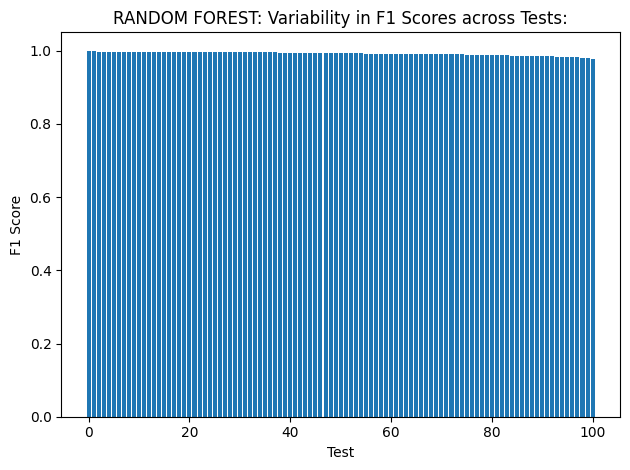

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(df_sorted.index.values, df_sorted['accuracy'])

# Step 2: Labeling the graph
plt.xlabel('Test')
plt.ylabel('F1 Score')
plt.title('RANDOM FOREST: Variability in F1 Scores across Tests:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig("classifier_visualizations/randomforest_f1_bar.jpg")

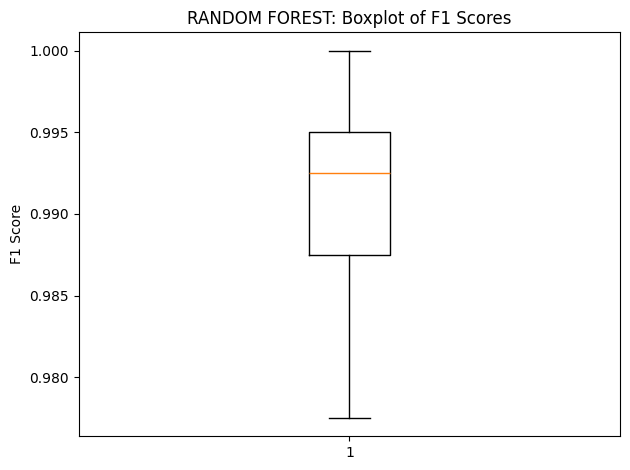

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure()  # Optional: Adjust figure size if necessary
plt.boxplot(df['accuracy'])

# Step 2: Label the graph
plt.ylabel('F1 Score')
plt.title('RANDOM FOREST: Boxplot of F1 Scores')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig("classifier_visualizations/randomforest_f1_box.jpg")

In [39]:
authentic = df['authentic_mislabeled'].tolist()

authentic_mislabeled = []

import ast

# Iterate over each string in the list
for item in authentic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    authentic_mislabeled.extend(sublist)

author_mislabeled = []

for x in authentic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled.append(name.lower())



string_counts = Counter(author_mislabeled)

# Create a DataFrame from the Counter dictionary
auth_df = pd.DataFrame(list(string_counts.items()), columns=['author', 'Count'])
auth_df = auth_df.sort_values("Count", ascending=False)

In [5]:
print("Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):")

auth_df.head(10)

Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
1,hopkins,54
0,griggs,23
2,twain,10
3,chesnutt,6
5,stoker,6
4,alcott,2
7,bronte,2
6,dickens,1


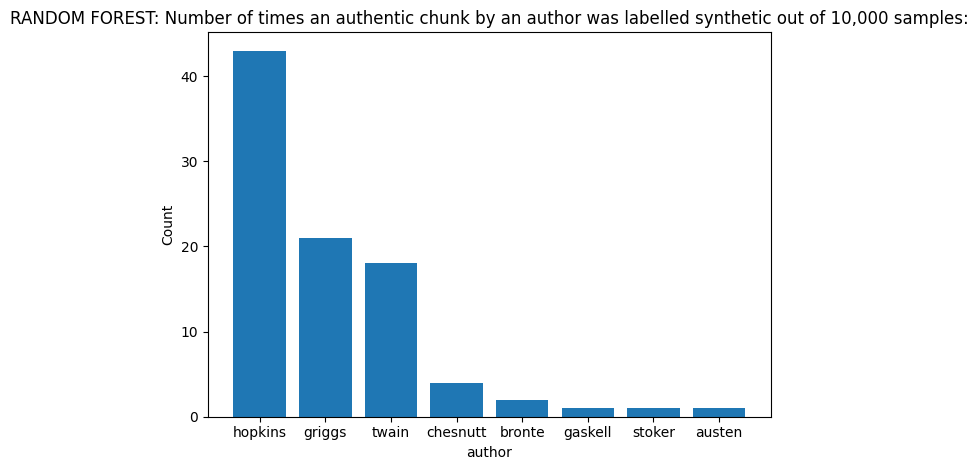

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df['author'], auth_df['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('RANDOM FOREST: Number of times an authentic chunk by an author was labelled synthetic out of 10,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig("classifier_visualizations/randomforest_authentic_mislabeled.jpg")

In [7]:
synthetic = df['synthetic_mislabeled'].tolist()

synthetic_mislabeled = []

import ast

# Iterate over each string in the list
for item in synthetic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    synthetic_mislabeled.extend(sublist)

author_mislabeled_syn = []

for x in synthetic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled_syn.append(name.lower())

string_counts_syn = Counter(author_mislabeled_syn)

# Create a DataFrame from the Counter dictionary
auth_df_syn = pd.DataFrame(list(string_counts_syn.items()), columns=['author', 'Count'])
auth_df_syn = auth_df_syn.sort_values("Count", ascending=False)

In [8]:
print("Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):")

auth_df_syn.head(10)

Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
0,twain,131
1,austen,97
2,dickens,6
3,griggs,5
5,alcott,2
4,bronte,1


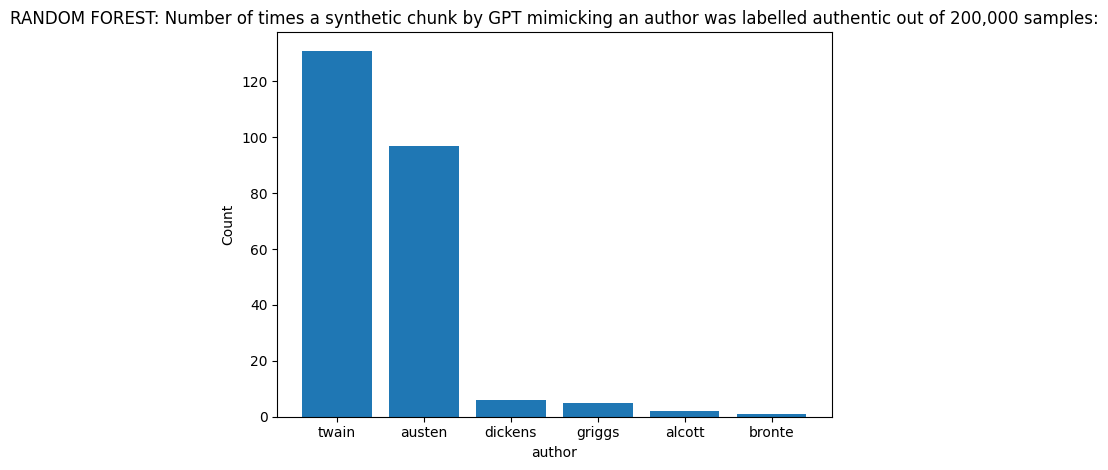

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df_syn['author'], auth_df_syn['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('RANDOM FOREST: Number of times a synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig("classifier_visualizations/randomforest_synthetic_mislabeled.jpg")

In [10]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)
    
all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])

In [11]:
feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
0,of,101
1,which,101
2,have,101
3,not,101
4,said,101
5,the,101
6,a,101
7,to,94
8,mean_sen_len,57
9,had,35


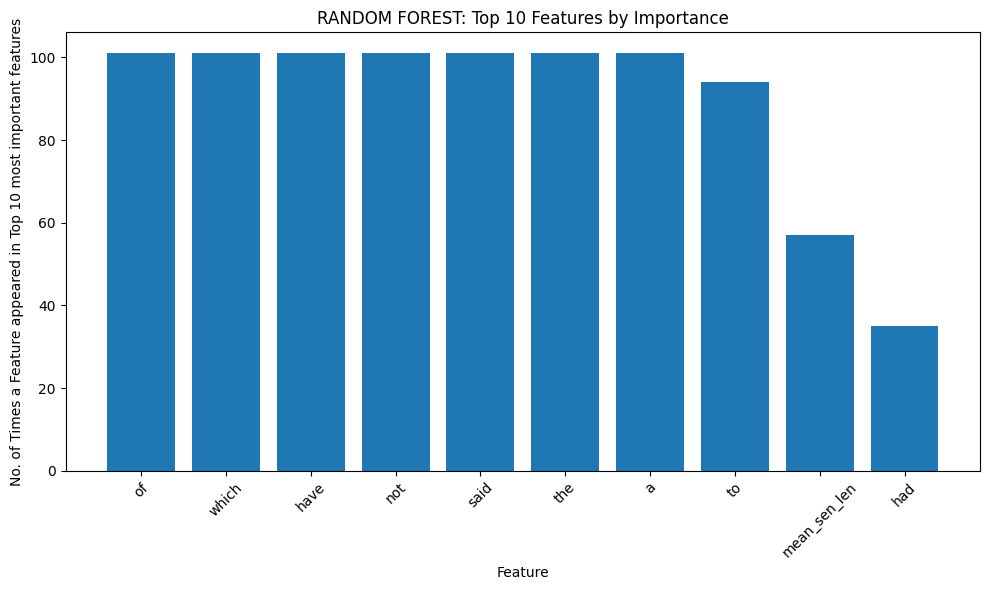

<Figure size 640x480 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(10, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important features')
plt.title('RANDOM FOREST: Top 10 Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

plt.savefig("classifier_visualizations/randomforest_topfeatures_bar.jpg")

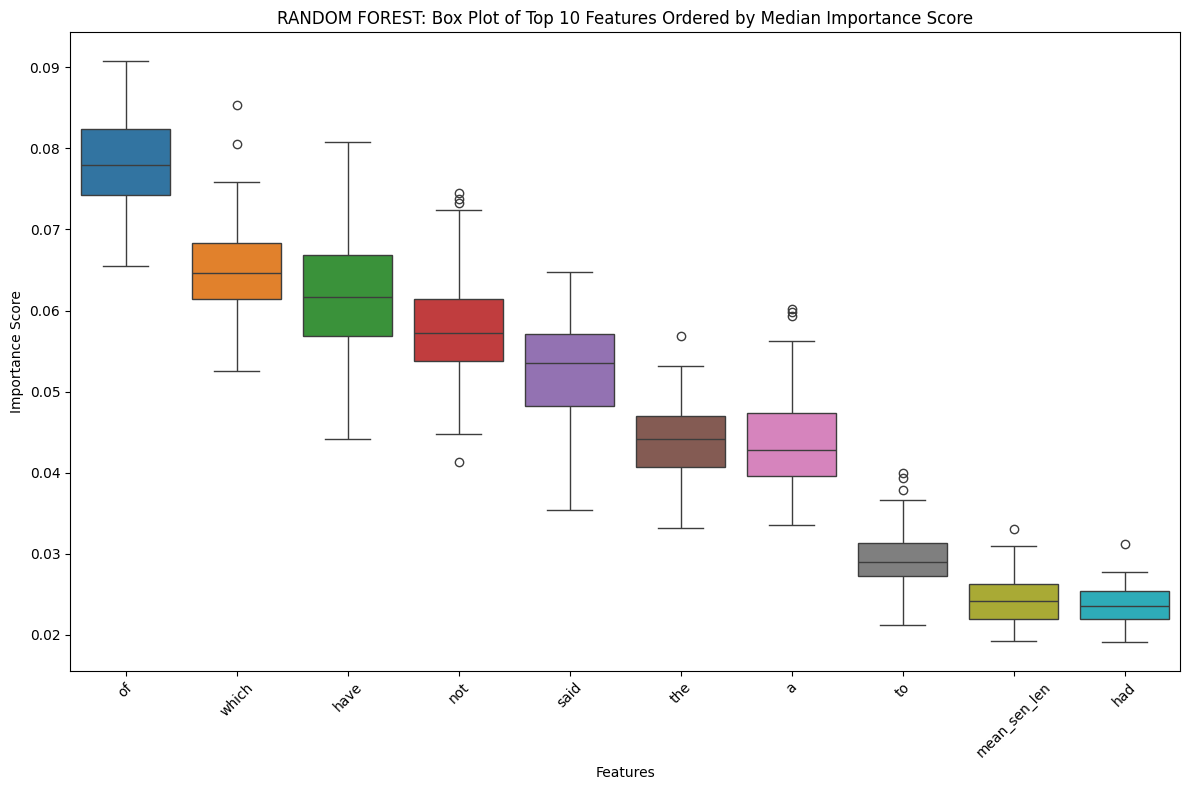

<Figure size 640x480 with 0 Axes>

In [43]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

medians = data.median().sort_values(ascending=False)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('RANDOM FOREST: Box Plot of Top 10 Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()

plt.savefig("classifier_visualizations/randomforest_topfeatures_box.jpg")
